<a href="https://colab.research.google.com/github/bajajraj/FI824AmazonReviewAnalysis/blob/main/FI824FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import nltk
import re
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
json_data = "/content/drive/MyDrive/Luxury_Beauty.json"

In [51]:
def return_dict(file):
  yield eval(file)

def parse(path):
  g = gzip.open(path, 'rb')
  return map(return_dict, g)
  
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [52]:
starting_df = pd.read_json(json_data, lines=True)

In [53]:
luxury_df = starting_df.copy(deep=True)

In [54]:
luxury_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [55]:
# Removing unwanted columns which are the style, image, reviewerID, reviewTime, reviewerName, unixReviewTime, and verified
luxury_df = luxury_df[['overall', 'vote', 'asin', 'reviewText', 'summary']]

In [56]:
luxury_df.head()

,overall,vote,asin,reviewText,summary
0,2,3,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5,14,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5,NaN,B00004U9V2,Great hand lotion,Five Stars
3,5,NaN,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars
4,5,NaN,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


In [57]:
luxury_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     574628 non-null  int64 
 1   vote        103689 non-null  object
 2   asin        574628 non-null  object
 3   reviewText  574228 non-null  object
 4   summary     574445 non-null  object
dtypes: int64(1), object(4)
memory usage: 21.9+ MB


In [58]:
vector = np.array(luxury_df['overall'])

# converting vector array of helpful to an int value as the list contains both values which are same.
for i in range(len(vector)):
    if 1 <= vector[i] <=2:
        vector[i] = str(vector[i])
    elif vector[i] == 3:
        vector[i] = str(vector[i])
    else:
        vector[i] = str(vector[i])

luxury_df['overall'] = vector.tolist()

luxury_df.head()


,overall,vote,asin,reviewText,summary
0,2,3,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5,14,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5,NaN,B00004U9V2,Great hand lotion,Five Stars
3,5,NaN,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars
4,5,NaN,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


In [59]:
# Converting overall review to sub categories for better regression
luxury_df["classes"] = luxury_df["overall"]
luxury_df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"negative",2.0:"negative",1.0:"negative"}, inplace=True)
luxury_df.head()

,overall,vote,asin,reviewText,summary,classes
0,2,3,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,negative
1,5,14,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.,positive
2,5,NaN,B00004U9V2,Great hand lotion,Five Stars,positive
3,5,NaN,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars,positive
4,5,NaN,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,positive


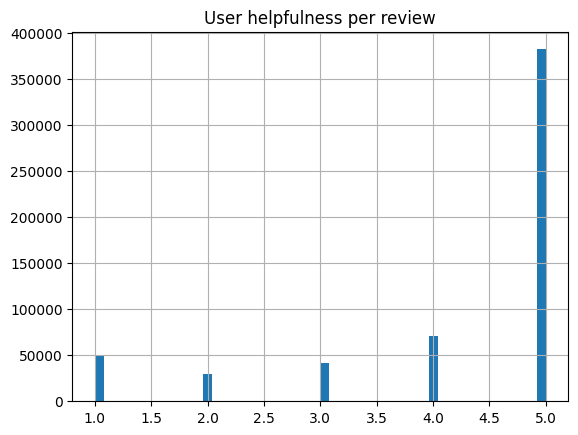

In [60]:
%matplotlib inline 
luxury_df["overall"].hist(bins=50)
plt.title("User helpfulness per review")
plt.show()

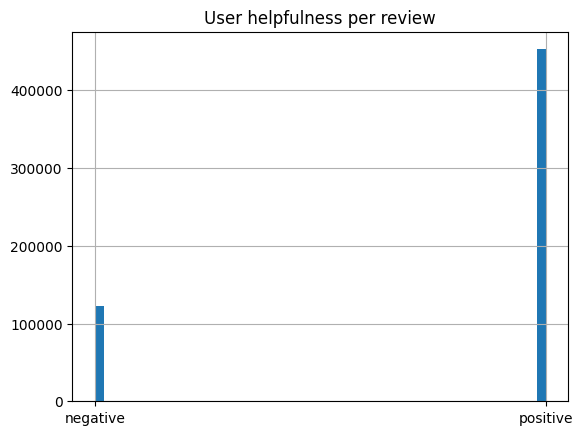

In [61]:
%matplotlib inline 
luxury_df["classes"].hist(bins=50)
plt.title("User helpfulness per review")
plt.show()

In [62]:
luxury_df = luxury_df.loc[luxury_df['reviewText'].apply(lambda x: isinstance(x, float)) == False]

In [63]:
luxury_df = luxury_df.dropna(subset=['reviewText'])

In [64]:
starting_review = luxury_df['reviewText'].to_list()
starting_review = starting_review[0]

In [65]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    '''
    This function removes the punctuation marks so that the data doesnot takes them into account.
    '''
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [66]:
luxury_df['reviewText']= luxury_df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))

In [67]:
print('Example of review before removing punctuation - ', starting_review)
current_review = luxury_df['reviewText'].to_list()
current_review = current_review[0]
print('Example of review after removing punctuation - ', current_review)

Example of review before removing punctuation -  I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work.  The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.
Example of review after removing punctuation -  i bought two of these 85 fl oz hand cream and neither of the dispensers work  the hand cream is wonderful but very thick so i dont see i can get much out by shaking it out since the dispensers seem to be nonoperable


In [68]:
stemmer = PorterStemmer()
# This code is taken from multiple sources and combined to get the desired output
# stop words are the words like "the, I, our etc"
words = stopwords.words("english") 
luxury_df['cleaned_reviews'] = luxury_df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [69]:
print('Example of review before removing punctuation - ', starting_review)
current_review = luxury_df['cleaned_reviews'].to_list()
current_review = current_review[0]
print('Example of review after removing stop words - ', current_review)

Example of review before removing punctuation -  I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work.  The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.
Example of review after removing stop words -  bought two fl oz hand cream neither dispens work hand cream wonder thick dont see get much shake sinc dispens seem nonoper


In [70]:
!pip install -q -U "tensorflow-text==2.11.*"

In [71]:
!pip install -q tf-models-official==2.11.0

In [103]:
!pip install keras-adamw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [73]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.11.1


In [80]:

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [81]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [82]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [83]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [84]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.7626287   0.99280983 -0.18611883  0.36673853  0.15233721  0.6550445
  0.9681154  -0.9486271   0.00216147 -0.98777324  0.06842694 -0.9763059 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.289463    0.34321296  0.33231434 ...  0.2130085   0.7102072
  -0.05771152]
 [-0.28742045  0.3198105  -0.23018534 ...  0.5845504  -0.2132971
   0.72692066]
 [-0.6615697   0.6887678  -0.87433004 ...  0.10877264 -0.26173142
   0.4785532 ]
 ...
 [-0.22561082 -0.28925622 -0.07064454 ...  0.47566032  0.8327713
   0.40025327]
 [-0.29824215 -0.27473125 -0.0545053  ...  0.48849735  1.0955358
   0.18163429]
 [-0.44378236  0.00930765  0.07223701 ...  0.17290132  1.1833243
   0.0789801 ]]


In [85]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [86]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.78763586]], shape=(1, 1), dtype=float32)


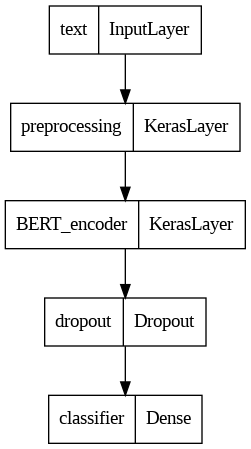

In [87]:
tf.keras.utils.plot_model(classifier_model)

In [88]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [99]:
luxury_df.head()

,overall,vote,asin,reviewText,summary,classes,cleaned_reviews
0,2,3,B00004U9V2,i bought two of these 85 fl oz hand cream and ...,dispensers don't work,negative,bought two fl oz hand cream neither dispens wo...
1,5,14,B00004U9V2,believe me over the years i have tried many ma...,Best hand cream ever.,positive,believ year tri mani mani differ hand cream on...
2,5,NaN,B00004U9V2,great hand lotion,Five Stars,positive,great hand lotion
3,5,NaN,B00004U9V2,this is the best for the severely dry skin on ...,Five Stars,positive,best sever dri skin hand
4,5,NaN,B00004U9V2,the best non oily hand cream ever it heals ove...,I always have a backup ready.,positive,best non oili hand cream ever heal overnight


In [92]:
def rand_split_train_test(features, label, train_perc=.8, random_state=42):
    """
    Shuffle the features and labels so they are in a random order.
        sklearn.utils.shuffle does this well.
    Then split the features and labels into training and testing sets
        where train_perc of the samples are in training and the
        remaining are for testing.
    """
    #features_shuffles, label_shuffle = shuffle(features, label, random_state=42)
    test_size = 1 - train_perc
    features_tr, features_te, label_tr, label_te = train_test_split(features, label, 
                                                                     train_size=train_perc,
                                                                     shuffle=True,
                                                                     random_state=random_state,
                                                                     stratify=label)
    
    return features_tr, features_te, label_tr, label_te

In [120]:
labels = luxury_df.pop('classes')

In [1]:
luxury_df = pd.concat((luxury_df,pd.get_dummies(luxury_df.summary)),1)

NameError: ignored

In [119]:
x_train, x_test, y_train, y_test = rand_split_train_test(luxury_df[['cleaned_reviews', 'summary']], luxury_df[['classes']])
x_train.head()

,cleaned_reviews,summary
227614,fast complet,Five Stars
259103,emolli realli like,I really like it.
315207,love highlight eye shadow,It's the balm!!
99459,use product along rene furter shampoo didnt se...,dont waste your money
117648,love smell work good lather allow shave even d...,I love the smell


In [118]:
x_train = tf.data.Dataset.from_tensor_slices(dict(x_train))
x_test = tf.data.Dataset.from_tensor_slices(dict(x_test))
y_train = tf.data.Dataset.from_tensor_slices(dict(y_train))
y_test = tf.data.Dataset.from_tensor_slices(dict(y_test))

ValueError: ignored

In [110]:
init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=3125,
                                          num_warmup_steps=312,
                                          optimizer_type='adamw')

In [111]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [115]:
scaler = StandardScaler()
features_tr = np.asarray(scaler.fit_transform(x_train)).astype('float32')
features_te = np.asarray(scaler.fit_transform(y_train)).astype('float32')

ValueError: ignored

In [113]:
epochs = 5
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=x_train,
                               validation_data=y_train,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1


ValueError: ignored